# Exploratory Data Analysis of the Ocular Disease Recognition dataset

### What do I plan to do?
I want to take the inputs:
- Patient info (Age, Sex)
- Fundus imagery

and output a set of diagnostic keywords for their pathology

#### Imports

In [66]:
#DS
import sys
import os
import re
import math
import numpy as np
import pandas as pd

In [2]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [53]:
def set_data_path(drive=True):
    if drive:
        homepath = os.path.join('content', 'drive', 'MyDrive', 'Colab Notebooks', 'Ocular pathology', 'ODIR-5K')
    else:
        homepath = os.path.join('..', 'raw_data')
    return homepath
path = set_data_path(False)

In [60]:
data = pd.read_csv(os.path.join(path, 'full_df.csv'))

In [61]:
data

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [67]:
def get_key_list(frame, key_list=None):
    if key_list == None:
        key_list = []
    for eye in frame:
        keywords = re.findall(r'([\w\-\s]+)', eye)
        for word in keywords:
            key_list.append(word.strip())
    return list(set(key_list))

In [68]:
left_key_list = get_key_list(data['Left-Diagnostic Keywords'])
right_key_list = get_key_list(data['Right-Diagnostic Keywords'], left_key_list)
len(right_key_list)

94

In [80]:
right_key_list.sort()
right_key_list

['abnormal pigment',
 'age-related macular degeneration',
 'anterior segment image',
 'arteriosclerosis',
 'atrophic change',
 'atrophy',
 'branch retinal artery occlusion',
 'branch retinal vein occlusion',
 'cataract',
 'central retinal artery occlusion',
 'central retinal vein occlusion',
 'central serous chorioretinopathy',
 'chorioretinal atrophy',
 'chorioretinal atrophy with pigmentation proliferation',
 'choroidal nevus',
 'congenital choroidal coloboma',
 'depigmentation of the retinal pigment epithelium',
 'diabetic retinopathy',
 'diffuse chorioretinal atrophy',
 'diffuse retinal atrophy',
 'drusen',
 'dry age-related macular degeneration',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'fundus laser photocoagulation spots',
 'glaucoma',
 'glial remnants anterior to the optic disc',
 'hypertensive retinopathy',
 'idiopathic choroidal neovascularization',
 'image offset',
 'intraretinal hemorrhage',
 'intraretinal microvascular abnormality',
 'laser spot',
 

In [62]:
# To extract the jpg filename
n=100
right = data[['Right-Fundus']].values
left = data[['Left-Fundus']].values
right[0][0]

'0_right.jpg'

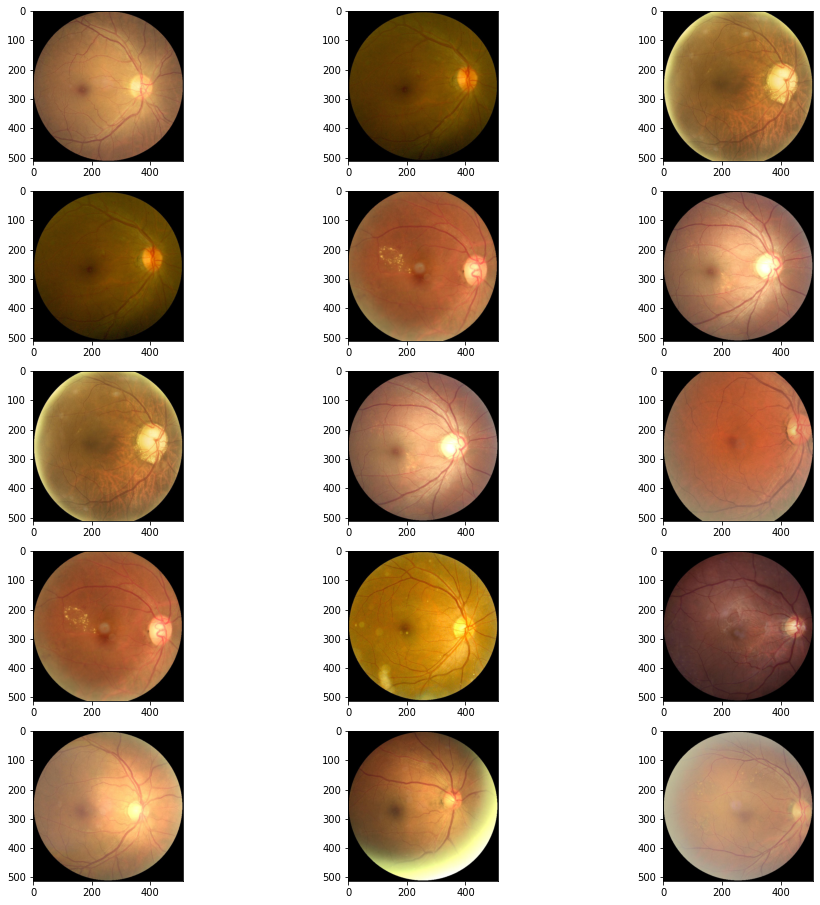

In [63]:
fig, axs = plt.subplots(5, 3, figsize=(16,16))

for i in range(5):
    for j in range(3):
        axs[i,j].imshow(plt.imread(f'../raw_data/preprocessed_images/{right[(i+1)*(j+1)][0]}'))